In [1]:
import pickle
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
POS_matrix = pickle.load(open("matrix.pickle", "rb"))

In [3]:
POS_possible = ["ADJ","ADP","ADV","AUX","CCONJ","DET","INTJ","NOUN","NUM","PART","PRON","PROPN","PUNCT","SCONJ","SYM","VERB","X", "<eps>"]

print(len(POS_possible))

18


In [ ]:
"""
POS_matrix = {"ADJ":[],"ADP":[],"ADV":[],"AUX":[],"CCONJ":[],"DET":[],"INTJ":[],"NOUN":[],"NUM":[],"PART":[],"PRON":[],"PROPN":[],"PUNCT":[],"SCONJ":[],"SYM":[],"VERB":[],"X":[], "<eps>":[]}
POS_matrix["NOUN"] = ["NOUN", "NOUN", "ADJ", "NOUN", ...] #noun a été classifié noun, adj, ...
"""

In [4]:

matrix = []
i = 0
for k, v in POS_matrix.items():
    row = []
    if k != POS_possible[i]:
        print("ERREUR!!!")
    for j in range(len(POS_possible)):
        row.append(v.count(POS_possible[j]))
    matrix.append(row)
    i += 1
    
matrix = np.array(matrix)
print(matrix.shape)

(18, 18)


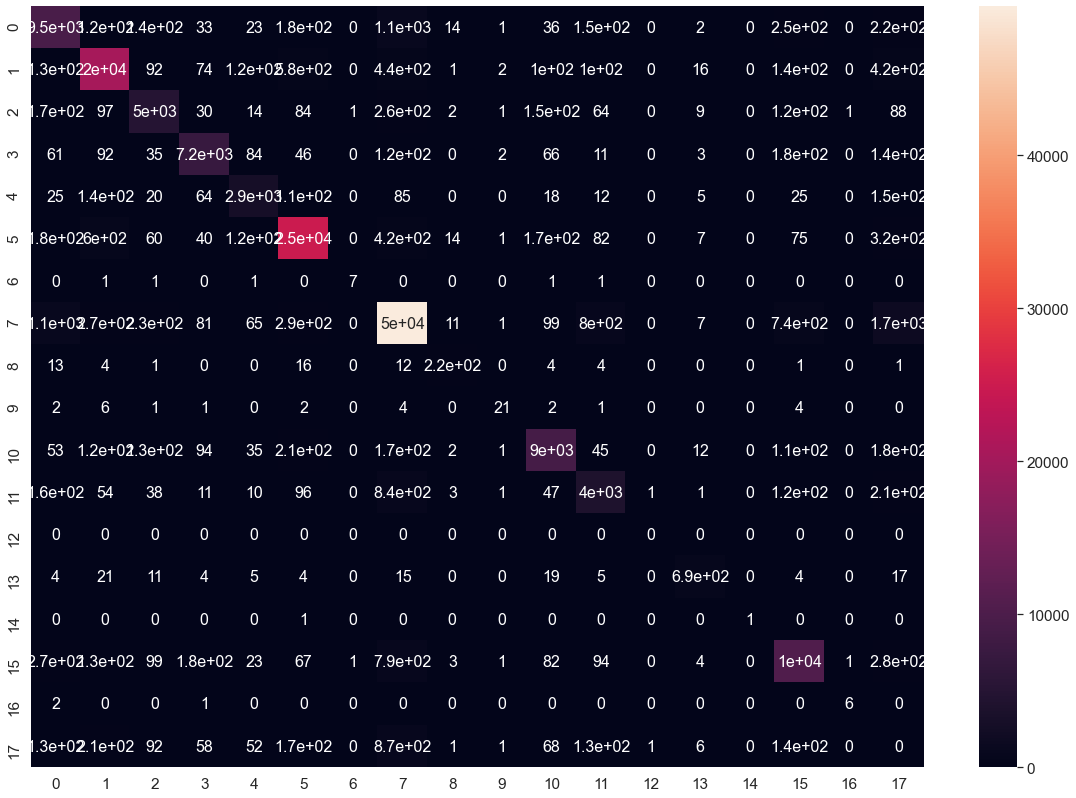

In [36]:
df_cm = pd.DataFrame(matrix, range(matrix.shape[0]), range(matrix.shape[0]))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [8]:
print(matrix)

[[ 9546   115   135    33    23   176     0  1140    14     1    36   154
      0     2     0   250     0   220]
 [  131 20486    92    74   124   579     0   444     1     2   100   103
      0    16     0   144     0   420]
 [  169    97  4977    30    14    84     1   258     2     1   153    64
      0     9     0   122     1    88]
 [   61    92    35  7227    84    46     0   116     0     2    66    11
      0     3     0   179     0   135]
 [   25   143    20    64  2898   112     0    85     0     0    18    12
      0     5     0    25     0   154]
 [  179   600    60    40   123 24984     0   415    14     1   169    82
      0     7     0    75     0   316]
 [    0     1     1     0     1     0     7     0     0     0     1     1
      0     0     0     0     0     0]
 [ 1108   266   227    81    65   289     0 49750    11     1    99   798
      0     7     0   738     0  1686]
 [   13     4     1     0     0    16     0    12   225     0     4     4
      0     0     0   

In [28]:
mat2 = matrix.copy()

for i in range(matrix.shape[0]):
    somme = np.sum(matrix[i])
    for j in range(matrix.shape[1]):
        if somme != 0:
            mat2[i][j] = matrix[i][j]/somme*100

In [60]:
def explain(abscisse, ordonne):
    print("La POS '" + str(POS_possible[ordonne]) + "' a été classifié " + str(matrix[ordonne][abscisse]) + " fois en tant que '" + str(POS_possible[abscisse] + "'. Ce qui représente " + str(mat2[ordonne][abscisse]) + "% des prédictions de '" + str(POS_possible[ordonne]) + "'."))
    
explain(0, 0)
#ordonne = ref
#abscisse = hyp

La POS 'ADJ' a été classifié 9546 fois en tant que 'ADJ'. Ce qui représente 80% des prédictions de 'ADJ'.


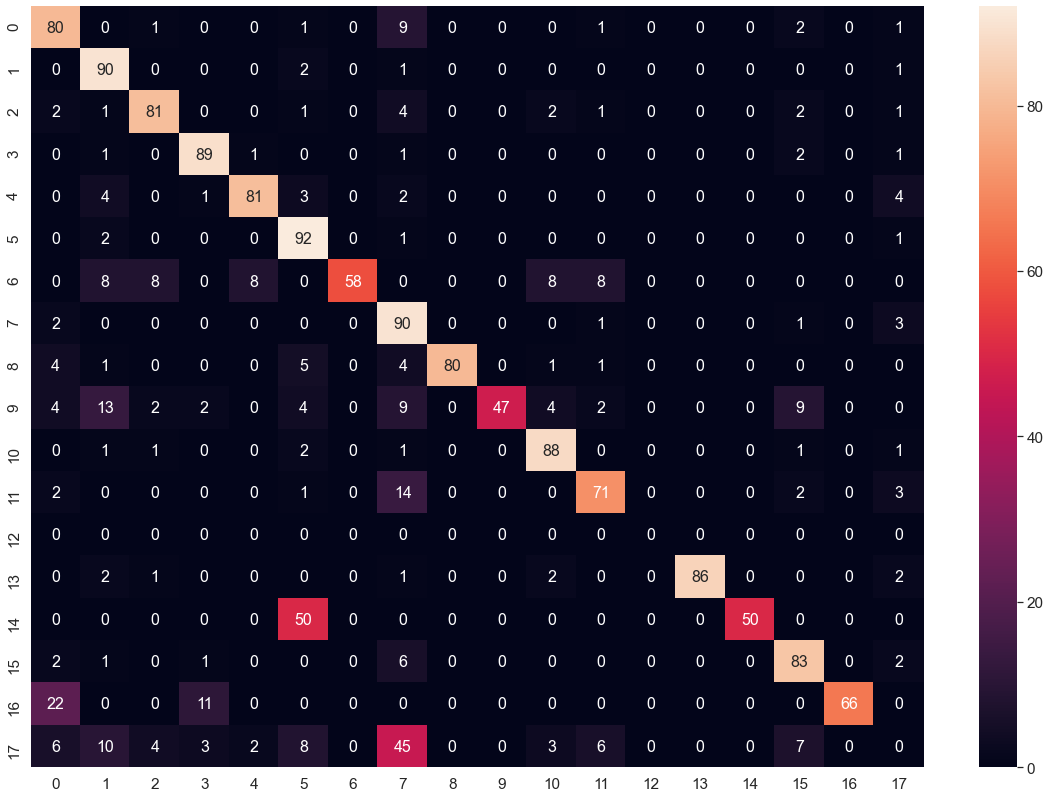

In [29]:
df_cm = pd.DataFrame(mat2, range(matrix.shape[0]), range(matrix.shape[0]))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [61]:
explain(abscisse=5, ordonne=14)
explain(abscisse=7, ordonne=17)

La POS 'SYM' a été classifié 1 fois en tant que 'DET'. Ce qui représente 50% des prédictions de 'SYM'.
La POS '<eps>' a été classifié 867 fois en tant que 'NOUN'. Ce qui représente 45% des prédictions de '<eps>'.
